In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'


def sparsify(x, l1, l2, verbose=True):
    s_int = []
    s_int.append(x.copy())
    dim = x.size
    assert (0 < l2) and (l2 <= l1) and (l1 <= np.sqrt(dim) * l2), "not feasible"

    s = np.copy(x) + (l1 - np.sum(x)) / dim
    Z = np.zeros(s.shape, dtype=bool)
    s_int.append(s.copy())
    while True:
        m = l1 / (dim - Z.sum()) * np.ones_like(s)
        m[Z] = 0.0

        # quadratic eqn coefs for alpha
        # w = s-m
        # v = s
        a = np.sum((s - m) ** 2)
        b = 2 * np.dot(m, s - m)
        c = np.sum(m**2) - l2**2

        alpha = (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)

        s = m + alpha * (s - m)
        s_int.append(s.copy())

        if verbose:
            print(f"l1 norm: {np.linalg.norm(s, ord=1):0.3f}")
            print(f"l2 norm: {np.linalg.norm(s, ord=2):0.3f}")
            print(f"l2 (x - s): {np.linalg.norm(x - s, ord=2):0.3f}")
            print(f"n zeros: {dim-Z.sum()}")
            print("-----------------")
        if np.all(s >= 0):
            return s, s_int

        Z = s < 0
        s[Z] = 0
        temp = s.sum()
        c = (temp - l1) / (dim - Z.sum())
        s[~Z] = s[~Z] - c

In [2]:
x = 1.5 * np.array([0.75, 1.5])
l1 = 1.2
l2 = 1.0
(
    x_norm,
    x_int,
) = sparsify(x, l1, l2)

l1 norm: 1.200
l2 norm: 1.000
l2 (x - s): 1.561
n zeros: 2
-----------------


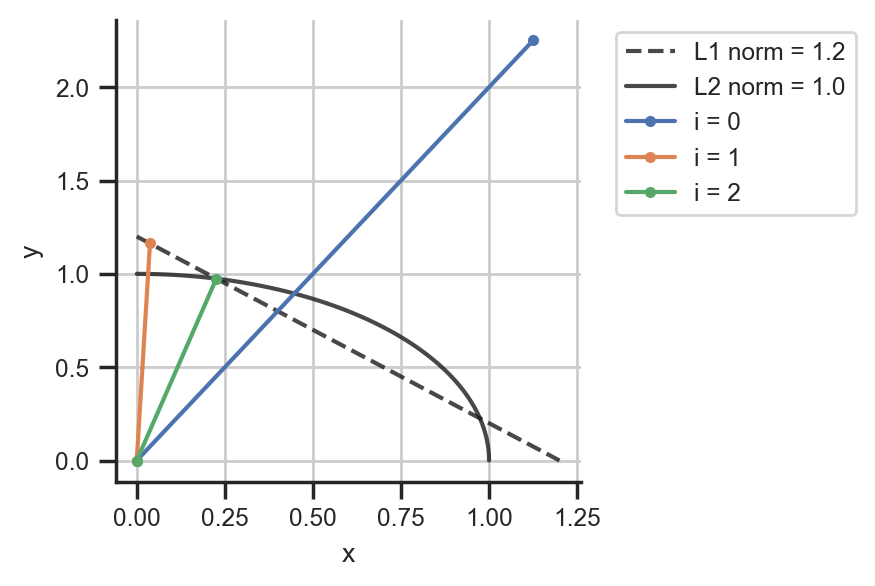

In [3]:
theta = np.linspace(0, np.pi / 2, 100)
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot([0, l1], [l1, 0], "--k", alpha=0.8, label=f"L1 norm = {l1}")
ax.plot(l2 * np.cos(theta), l2 * np.sin(theta), "-k", alpha=0.8, label=f"L2 norm = {l2}")
for i, v in enumerate(x_int):
    ax.plot([0, v[0]], [0, v[1]], ".-", alpha=1, label=f"i = {i}")
ax.set(xlabel="x", ylabel="y")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(True)
plt.show()